In [1]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [4]:
%cd /content/drive/My Drive/Hackathon/

/content/drive/My Drive/Hackathon


In [5]:
!ls

image.jpg


In [7]:
import cv2
image = cv2.imread('image.jpg')

In [10]:
result = model.predict(image, save=True)


0: 480x640 8 bowls, 1 dining table, 14.4ms
Speed: 1.5ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


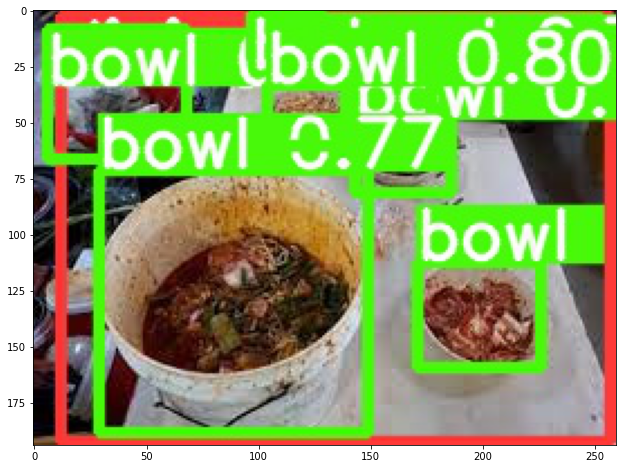

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

predict_image = np.array(Image.open('runs/detect/predict/image0.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(predict_image)

In [20]:
print(result[0].boxes.boxes)

tensor([[104.00000,  33.00000, 141.00000,  60.00000,   0.80095,  45.00000],
        [ 29.00000,  71.00000, 149.00000, 188.00000,   0.77237,  45.00000],
        [139.00000,  27.00000, 177.00000,  52.00000,   0.71110,  45.00000],
        [143.00000,  48.00000, 186.00000,  81.00000,   0.69975,  45.00000],
        [ 97.00000,   1.00000, 129.00000,  21.00000,   0.51142,  45.00000],
        [  6.00000,   8.00000,  68.00000,  66.00000,   0.49214,  45.00000],
        [ 12.00000,   2.00000, 257.00000, 192.00000,   0.45618,  60.00000],
        [102.00000,   2.00000, 125.00000,  21.00000,   0.30498,  45.00000],
        [171.00000, 112.00000, 226.00000, 159.00000,   0.27406,  45.00000]], device='cuda:0')


## Crop

In [80]:
crops = []
for i in range(len(result[0])):
  cor = list(result[0].boxes.boxes[i][:4])
  crop = image[int(cor[1]):int(cor[3]), int(cor[0]):int(cor[2])]
  crops.append(crop)

## 이미지로 확인

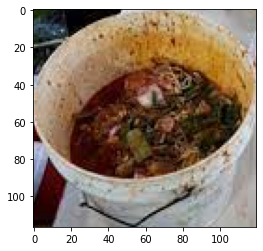

In [84]:
plt.imshow(cv2.cvtColor(crops[1], cv2.COLOR_BGR2RGB));

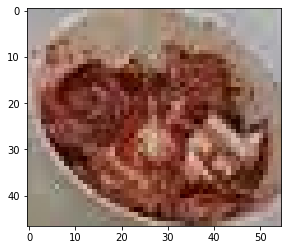

In [85]:
plt.imshow(cv2.cvtColor(crops[8], cv2.COLOR_BGR2RGB));